<a href="https://colab.research.google.com/github/POde97/Cell2CellMatch/blob/main/C2CMatch_Example_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install Dependencies**

In [1]:
import os
#Cell2CellMatch depends on CellID representation thus we first install CellIDpy
!git clone https://github.com/POde97/CellIDpy.git
os.chdir("CellIDpy/")
!pip install -q . 
os.chdir("..")
!git clone https://github.com/POde97/Cell2CellMatch.git
os.chdir("Cell2CellMatch/")
!pip install -q .
os.chdir("..")

Cloning into 'CellIDpy'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 208 (delta 42), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% (208/208), 563.68 KiB | 20.88 MiB/s, done.
Resolving deltas: 100% (101/101), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 6.

#**Download Data**

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E' -O "Baron.h5ad"

--2023-03-28 14:12:31--  https://docs.google.com/uc?export=download&id=10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E
Resolving docs.google.com (docs.google.com)... 142.251.10.101, 142.251.10.139, 142.251.10.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.10.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6p06cu5forvm6du78afgtnafmfs4cagr/1680012750000/15472246493323528491/*/10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E?e=download&uuid=ca633942-fa44-49fb-bf55-2a4b9d3d82d1 [following]
--2023-03-28 14:12:35--  https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6p06cu5forvm6du78afgtnafmfs4cagr/1680012750000/15472246493323528491/*/10rHN_60c2NJvVh8HXcY7P6jNBS9ptp5E?e=download&uuid=ca633942-fa44-49fb-bf55-2a4b9d3d82d1
Resolving doc-0k-8c-docs.googleusercontent.com (doc-0k-8c-docs.googleusercontent.com)... 74.125.24.132, 2404:6800:4

#**Load data, build Cell2CellMatch network and perform community detection**


In brief, Cell2CellMatch() class generate a network representation of cells based on multiple correspondence analysis (mca) representation. Cells are connected through edges weighted by the correspondent Pvalue obtained through an hypergeometric test. Further it finds best treshold on Pvalue distribution and prune not significant edges, finally it detects community using Leiden Algoritm 

In [ ]:
from CellID import*
from ProteinCoding import*
from CellID import*
from HyperG import* 
from Cell2CellMatch import*
from utils import*
from ProteinCoding import*




In [4]:
import scanpy as sc

adata = sc.read("Baron.h5ad")
adata.obs["batch"] = adata.obs["orig.ident"]
#subset data to the first two batch to speed up computation 
adata = adata[adata.obs["batch"].isin([0,1])].copy()
sc.pp.filter_cells(adata, min_counts=5)

In [5]:
from Cell2CellMatch import Cell2CellMatch
C2C = Cell2CellMatch.Cell2CellMatch(adata,gpu_cuda = True,mply_p = 16)

Performing Cell-ID per batch


100%|██████████| 2/2 [00:46<00:00, 23.49s/it]


Hypergeometric Test


  0%|          | 0/160 [00:00<?, ?it/s]

Build network + sparsification
Find communities


In [6]:
from sklearn.metrics.cluster import adjusted_mutual_info_score as AMI
adata1 = adata[~adata.obs["C2C-cl"].isna()]
print("Adjusted Mutual Information: ",AMI(list(adata1.obs["cell.type"]),list(adata1.obs["C2C-cl"])))

Adjusted Muataual Information:  0.8671667014611284


#**Visualization**

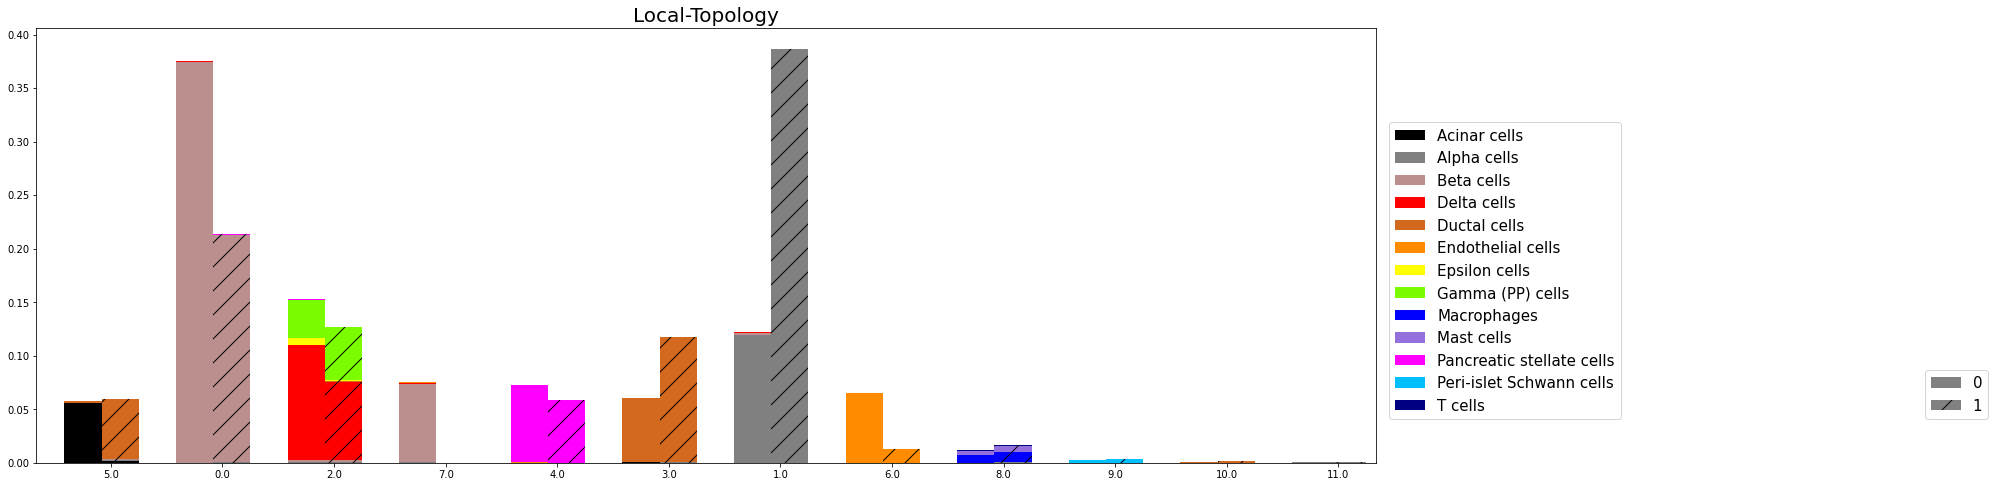

In [7]:
color = ["black","gray","rosybrown","red","chocolate","darkorange","yellow","lawngreen","blue","mediumpurple","fuchsia","deepskyblue","navy",'gainsboro']
C2C.Clvis1("cell.type",n=1,color=color)

#**Cluster signatures enrichment**

In [8]:
!pip install gseapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00


In [9]:
df_sign_cl = C2C.XClusterSignature()

In [10]:
import gseapy
gene_set_names = gseapy.get_library_name(organism='Human')
Henrich=[]
dftot = df_sign_cl
cl_l = list(dftot.index)
for i in range(len(dftot)):
  glist = list(dftot.iloc[i]["signature"])

  cl = cl_l[i]
  #glist = list(glist.dropna().drop("index").sort_values(ascending = False).index)[:200]
  enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets='GO_Biological_Process_2018',
                     
                     cutoff = 0.5)
  
  Henrich.append([cl,enr_res.results.iloc[0]["Term"],
    enr_res.results.iloc[0]["Adjusted P-value"],
    enr_res.results.iloc[0]["Genes"]])

In [12]:
import pandas as pd
d_top200 = pd.DataFrame(Henrich,columns = ["cluster","GO-Top200","P_val200","GenesTop200"])
d_top200

,cluster,GO-Top200,P_val200,GenesTop200
0,cluster-5.0,diterpenoid metabolic process (GO:0016101),1.230286e-05,CLPS;RBP2;SDC4;RARRES2;AKR1C1;APOA2;AKR1C3;RDH...
1,cluster-0.0,plasma membrane bounded cell projection organi...,2.770629e-05,CFAP61;ADCYAP1;GPM6A;NPY;RASGRF1;TMEM108;MAPT;...
2,cluster-2.0,chemical synaptic transmission (GO:0007268),7.011128e-03,GABRB3;GABRA1;CHRM3;SYT1;MCHR1;GABRG2;SHISA6;G...
3,cluster-7.0,positive regulation of T-helper 2 cell differe...,2.144698e-02,TNFSF4;NLRP3;PRKCZ
4,cluster-4.0,extracellular matrix organization (GO:0030198),3.182051e-28,COL18A1;SPARC;COL16A1;COL14A1;LAMC3;COL12A1;NI...
5,cluster-3.0,positive regulation of MAPK cascade (GO:0043410),8.770976e-06,EPHB6;EDN1;TGFB2;CAV2;TNFRSF10B;CX3CL1;EGFR;PD...
6,cluster-1.0,potassium ion transport (GO:0006813),2.514164e-03,KCNJ6;KCNC1;KCND3;KCNMB2;KCNAB1;KCNA5;KCNJ3
7,cluster-6.0,vasculogenesis (GO:0001570),6.033168e-10,RAMP2;EGFL7;NOTCH1;FLT1;SOX17;SOX18;FLT4;KDR;R...
8,cluster-8.0,neutrophil activation involved in immune respo...,1.222214e-11,ARHGAP9;HVCN1;FGL2;PTAFR;ITGB2;CTSS;TRPM2;MMP2...
9,cluster-9.0,nervous system development (GO:0007399),1.594161e-06,KIRREL3;PCDHGB6;PTN;GFRA3;S100B;GFRA2;FGF5;RCA...
